In [1]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import sys
from tqdm import tqdm
sys.path.append('../')

In [2]:
%load_ext autoreload
%autoreload 2
from dance.filtering import WienerFilter
from dance.qe import Reconstruct
from dance.utils import bin_cmb_spectrum

MPI startup(): FI_PSM3_UUID was not generated, please set it to avoid possible resources ownership conflicts between MPI processes


In [3]:
basedir = '/mnt/sdceph/users/alonappan/DANCE'

In [22]:
recon_iso = Reconstruct(basedir,2048,1,True,"iso",beta=0.35,lmin_ivf=2,lmax_ivf=4096,lmax_qlm=4096,qe_key="p_p")

CMB : INFO - Isotropic(constant) cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Isotropic(constant) cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file


/mnt/home/alonappan/anaconda3/cstm_pkgs/plancklens/plancklens/utils.py:124: RuntimeWarning: overflow encountered in cast
  return hashlib.sha1(np.copy(cl.astype(dtype), order='C')).hexdigest()


In [23]:
cl_pp = recon_iso.get_cl_th()[:recon_iso.lmax_qlm+1]

In [24]:
L = np.arange(recon_iso.lmax_qlm+1)
dl = L**2 * (L**2 + 1) / (2*np.pi)

In [34]:
lbin_p,_ = bin_cmb_spectrum(cl_pp,5)

In [25]:
clpp = []
for i in tqdm(range(100)):
    oalm = recon_iso.get_qlm(i)
    ralm = recon_iso.get_qlm_th(i)
    lbin, _cl = bin_cmb_spectrum(hp.alm2cl(oalm,ralm)*dl, 5)
    clpp.append(_cl)
clpp = np.array(clpp)

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [06:15<00:00,  3.76s/it]


/mnt/home/alonappan/anaconda3/cstm_pkgs/plancklens/plancklens/utils.py:124: RuntimeWarning: overflow encountered in cast
  return hashlib.sha1(np.copy(cl.astype(dtype), order='C')).hexdigest()


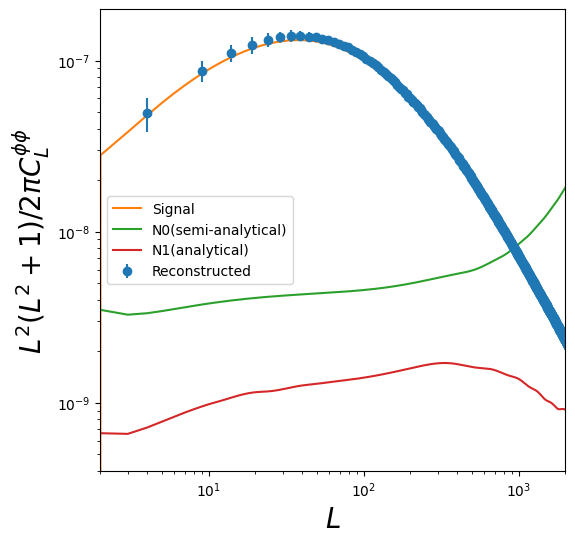

In [38]:

plt.figure(figsize=(6,6))
plt.errorbar(lbin_p,clpp.mean(axis=0),yerr=clpp.std(axis=0),fmt='o',label='Reconstructed',markersize=6)
plt.loglog(cl_pp*dl,label='Signal')
plt.loglog(recon_iso.get_n0(0)*dl,label='N0(semi-analytical)')
plt.loglog(recon_iso.get_n1(0)*dl,label='N1(analytical)')
plt.xlabel(r'$L$',fontsize=20)
plt.ylabel(r'$L^2(L^2 + 1)/2 \pi C_L^{\phi \phi}$',fontsize=20)
plt.legend()
plt.xlim(2,2000)
plt.savefig('qlm.pdf',bbox_inches='tight',dpi=300)

In [27]:
recon_iso_a = Reconstruct(basedir,2048,1,True,"aniso",Acb=1e-6,lmin_ivf=2,lmax_ivf=4096,lmax_qlm=4096,qe_key="a_p")

CMB : INFO - Anisotropic cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
CMB : INFO - Anisotropic cosmic birefringence model selected
CMB : INFO - Loading CMB power spectra from file
/mnt/home/alonappan/anaconda3/cstm_pkgs/plancklens/plancklens/utils.py:124: RuntimeWarning: overflow encountered in cast
  return hashlib.sha1(np.copy(cl.astype(dtype), order='C')).hexdigest()


In [28]:
cl_aa = recon_iso_a.get_cl_th()[:recon_iso_a.lmax_qlm+1]

In [36]:
lbin_a,_ = bin_cmb_spectrum(cl_aa,2)

In [31]:
claa = []
for i in tqdm(range(100)):
    ralm = recon_iso_a.get_qlm(i,norm=True)
    oalm = recon_iso_a.get_qlm_th(i)        
    qcl =  hp.alm2cl(ralm,oalm)
    lbin, _cl = bin_cmb_spectrum(qcl, 2)
    claa.append(_cl)
claa = np.array(claa)

100%|██████████| 100/100 [06:05<00:00,  3.65s/it]


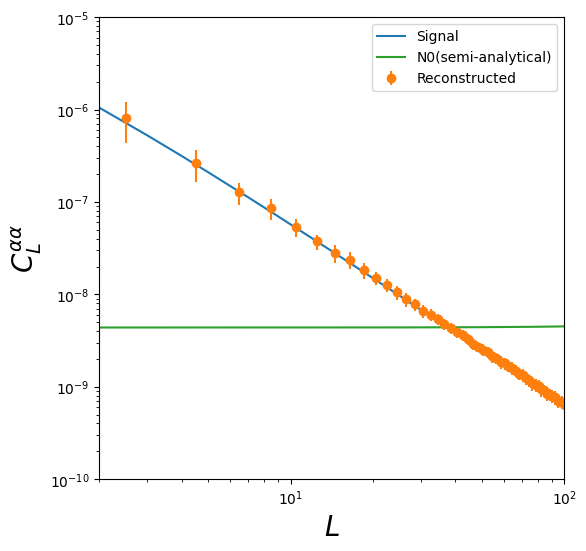

In [41]:
plt.figure(figsize=(6,6))
plt.loglog(cl_aa,label='Signal')
plt.errorbar(lbin_a,claa.mean(axis=0),yerr=claa.std(axis=0),fmt='o',label='Reconstructed',markersize=6)
plt.loglog(recon_iso_a.get_n0(0),label='N0(semi-analytical)')
plt.ylim(1e-10,1e-5)
plt.xlim(2,100)
plt.xlabel(r'$L$',fontsize=20)
plt.ylabel(r'$C_L^{\alpha \alpha}$',fontsize=20)
plt.legend()
plt.savefig('alm.pdf',bbox_inches='tight',dpi=300)